In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format



In [2]:
# Download the HMEQ Data set
# Read the data into Python
# Explore both the input and target variables using statistical techniques.
# Explore both the input and target variables using graphs and other visualization.
# Look for relationships between the input variables and the targets.
# Fix (impute) all missing data.
# Note: For numerical data, create a flag variable to indicate if the value was missing
# Convert all categorical variables into numeric variables ( using one hot encoding )
 

In [3]:
data_dir = '../data_sets/'
data_file  = 'HMEQ_Loss.csv'
target_a = 'TARGET_BAD_FLAG'
target_b = 'TARGET_LOSS_AMT'

In [4]:
df = pd.read_csv(f'{data_dir}{data_file}')

In [5]:
display(df.shape, df.head(), df.dtypes, df.describe().T)

(5960, 14)

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.00,1100,25860.00,39025.00,HomeImp,Other,10.50,0.00,0.00,94.37,1.00,9.00,NaN
1,1,1109.00,1300,70053.00,68400.00,HomeImp,Other,7.00,0.00,2.00,121.83,0.00,14.00,NaN
2,1,767.00,1500,13500.00,16700.00,HomeImp,Other,4.00,0.00,0.00,149.47,1.00,10.00,NaN
3,1,1425.00,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.00,112000.00,HomeImp,Office,3.00,0.00,0.00,93.33,0.00,14.00,NaN


TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
TARGET_LOSS_AMT,1189.00,13414.58,10839.46,224.00,5639.00,11003.00,17634.00,78987.00
LOAN,5960.00,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.00,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.00,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.00,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.00,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.00,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.00,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.00,1.19,1.73,0.00,0.00,1.00,2.00,17.00


In [6]:
#exploring missing value
#target loss amount has about 80% missing values, assuming these are the not bad loan.
#if that's the case, will fill mmissing values with 0
for i in df.columns:
    if df[i].isna().sum()==0: continue
    print(i, 'sum of nans:', df[i].isna().sum(), 'pct of missing:', round(df[i].isna().sum()/df.shape[0],4), '\n') #this print columns names with 0 values 

TARGET_LOSS_AMT sum of nans: 4771 pct of missing: 0.8005 

MORTDUE sum of nans: 518 pct of missing: 0.0869 

VALUE sum of nans: 112 pct of missing: 0.0188 

REASON sum of nans: 252 pct of missing: 0.0423 

JOB sum of nans: 279 pct of missing: 0.0468 

YOJ sum of nans: 515 pct of missing: 0.0864 

DEROG sum of nans: 708 pct of missing: 0.1188 

DELINQ sum of nans: 580 pct of missing: 0.0973 

CLAGE sum of nans: 308 pct of missing: 0.0517 

NINQ sum of nans: 510 pct of missing: 0.0856 

CLNO sum of nans: 222 pct of missing: 0.0372 

DEBTINC sum of nans: 1267 pct of missing: 0.2126 



0    4771
1    1189
Name: TARGET_BAD_FLAG, dtype: int64

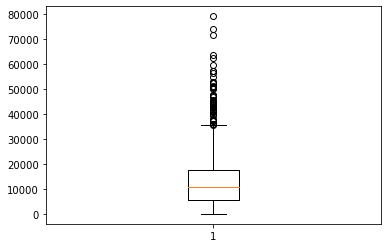

In [7]:
#exploring target variables
display(df[target_a].value_counts())
plt.boxplot(df[target_b].dropna())
plt.show()

*******REASON********
unique values: ['HomeImp' nan 'DebtCon'] 

Value Counts: DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64 



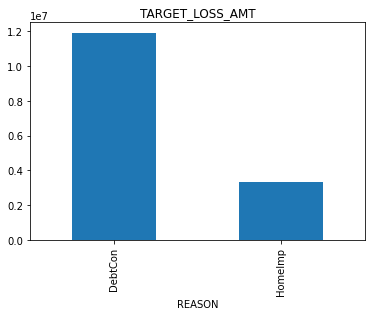

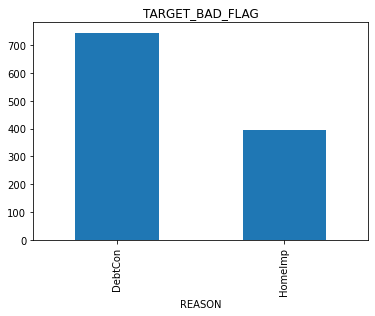

*******JOB********
unique values: ['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self'] 

Value Counts: Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64 



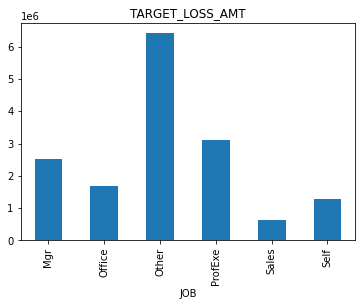

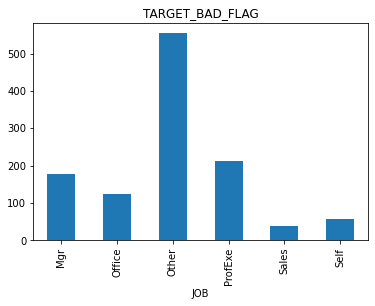

In [8]:
#check Unique Values for categorical variables
for col in df.columns:
    if  df[col].dtype == 'object':
        print (f'*******{col}********')
        print(f'unique values: {df[col].unique()}', '\n')
        print(f'Value Counts: {df[col].value_counts()}', '\n')
        df.groupby(col)[target_b].sum().plot(kind = 'bar')
        plt.title(target_b)
        plt.show()
        df.groupby(col)[target_a].sum().plot(kind = 'bar')
        plt.title(target_a)
        plt.show()



In [9]:
df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.00,1100,25860.00,39025.00,HomeImp,Other,10.50,0.00,0.00,94.37,1.00,9.00,NaN
1,1,1109.00,1300,70053.00,68400.00,HomeImp,Other,7.00,0.00,2.00,121.83,0.00,14.00,NaN
2,1,767.00,1500,13500.00,16700.00,HomeImp,Other,4.00,0.00,0.00,149.47,1.00,10.00,NaN
3,1,1425.00,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.00,112000.00,HomeImp,Office,3.00,0.00,0.00,93.33,0.00,14.00,NaN


## Imputing Missing Values

In [10]:
#target variables
#only targegt loss amount had nans
df[[target_a, target_b]][df[[target_a, target_b]].isna().any(axis=1)]

,TARGET_BAD_FLAG,TARGET_LOSS_AMT
4,0,NaN
13,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN
...,...,...
5955,0,NaN
5956,0,NaN
5957,0,NaN
5958,0,NaN


In [11]:
df['IMP_TARGET_LOSS_AMT'] = np.where(df['TARGET_BAD_FLAG'] == 0, 0, df['TARGET_LOSS_AMT'])
df['FLAG_TARGET_LOSS_AMT'] = df['TARGET_LOSS_AMT'].isna()+0


In [12]:
#Categorical variables. Filling with mode
for col in df.columns:
    if  df[col].dtype == 'object':
        df[f'z_{col}'] = df[col].fillna(df[col].mode()[0])
    

In [13]:
#Numeric variables. Filling with median
for col in [ i for i in df.columns if 'TARGET_LOSS_AMT' not in i and  'TARGET_BAD_FLAG' not in i] :
    if  df[col].dtype != 'object' and col :
        print(col, df[col].median())
        df[f'IMP_{col}'] = df[col].fillna(df[col].median())
        df[f'flag_{col}'] = df[col].isna()+0    

LOAN 16300.0
MORTDUE 65019.0
VALUE 89235.5
YOJ 7.0
DEROG 0.0
DELINQ 0.0
CLAGE 173.4666667
NINQ 1.0
CLNO 20.0
DEBTINC 34.81826182


In [14]:
### One-Hot Encoding

In [15]:
one_encoding_l = ['JOB', 'REASON']

In [17]:
one_hot_dfs= []
for each in one_encoding_l:
     one_hot_dfs.append(pd.get_dummies(df[f'z_{each}'], prefix = f'z_{each}', drop_first= True))

In [18]:
#concat to create a complete dataset 
comp_df = pd.concat([df]+one_hot_dfs, axis = 1)

In [19]:
comp_df

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,...,IMP_CLNO,flag_CLNO,IMP_DEBTINC,flag_DEBTINC,z_JOB_Office,z_JOB_Other,z_JOB_ProfExe,z_JOB_Sales,z_JOB_Self,z_REASON_HomeImp
0,1,641.00,1100,25860.00,39025.00,HomeImp,Other,10.50,0.00,0.00,...,9.00,0,34.82,1,0,1,0,0,0,1
1,1,1109.00,1300,70053.00,68400.00,HomeImp,Other,7.00,0.00,2.00,...,14.00,0,34.82,1,0,1,0,0,0,1
2,1,767.00,1500,13500.00,16700.00,HomeImp,Other,4.00,0.00,0.00,...,10.00,0,34.82,1,0,1,0,0,0,1
3,1,1425.00,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.00,1,34.82,1,0,1,0,0,0,0
4,0,NaN,1700,97800.00,112000.00,HomeImp,Office,3.00,0.00,0.00,...,14.00,0,34.82,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,NaN,88900,57264.00,90185.00,DebtCon,Other,16.00,0.00,0.00,...,16.00,0,36.11,0,0,1,0,0,0,0
5956,0,NaN,89000,54576.00,92937.00,DebtCon,Other,16.00,0.00,0.00,...,15.00,0,35.86,0,0,1,0,0,0,0
5957,0,NaN,89200,54045.00,92924.00,DebtCon,Other,15.00,0.00,0.00,...,15.00,0,35.56,0,0,1,0,0,0,0
5958,0,NaN,89800,50370.00,91861.00,DebtCon,Other,14.00,0.00,0.00,...,16.00,0,34.34,0,0,1,0,0,0,0


In [23]:
#savign out two dataset.one with all columns and one clean dataset
comp_df.to_csv('../data_sets/SA_comp_HMEQ_Loss.csv', index=False)

comp_df[[target_a]+[i for i in comp_df.columns if 'IMP' in i or 'flag' in i]+\
        [i for i in comp_df.columns if i.startswith('z_')]].to_csv('../data_sets/SA_clean_HMEQ_Loss.csv', index=False)
